**Article about Model:** https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

In [ ]:
# Install this library


# !pip install mtcnn==0.1.0
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3
# !pip install keras-vggface==0.6
# !pip install keras_applications==1.0.8

In [65]:
# Fatch kaggle dataset

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [66]:
# Dataset API Command that you copied from Kaggle dataset

!kaggle datasets download -d sushilyadav1998/bollywood-celeb-localized-face-dataset

# To unzip folder and files

import zipfile

zip_ref = zipfile.ZipFile(file="/content/bollywood-celeb-localized-face-dataset.zip", mode='r')
zip_ref.extractall(path='/content')
zip_ref.close()

 91% 25.0M/27.6M [00:00<00:00, 108MB/s] 
100% 27.6M/27.6M [00:00<00:00, 100MB/s]


In [2]:
# Import necessary library

import numpy as np
import cv2
from PIL import Image
import pickle
import os
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from mtcnn import MTCNN
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Let's our pickle files

filenames_path = r"/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Projects/Which Bollywood Celebrity Are You/Files/filename_paths.pkl"

features_path = r"/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Projects/Which Bollywood Celebrity Are You/Files/all_features.pkl"

filenames = pickle.load(file=open(file=filenames_path, mode="rb"))

features = np.array(pickle.load(file=open(file=features_path, mode="rb")))

In [5]:
features.shape

(8664, 2048)

In [6]:
features[0]

array([0.        , 0.        , 1.8680837 , ..., 0.        , 1.2708895 ,
       0.10167735], dtype=float32)

In [7]:
from google.colab.patches import cv2_imshow

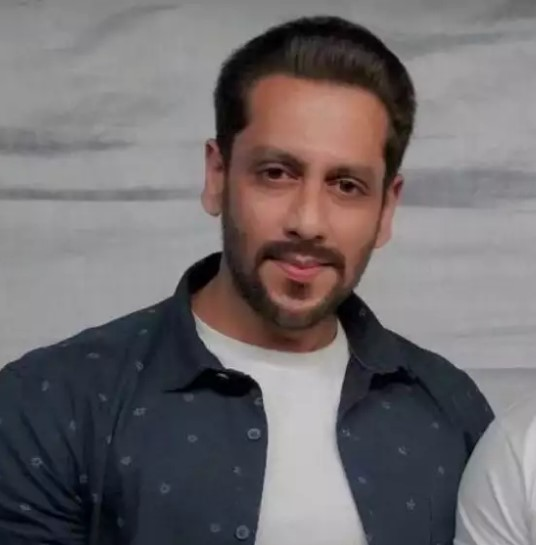

In [8]:
# Load Image and detect the face

input_img = cv2.imread("/content/Screenshot_1.jpg")

cv2_imshow(input_img)

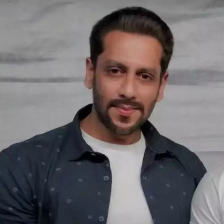

In [9]:
resize_img = cv2.resize(src=input_img, dsize=(224,224))

cv2_imshow(resize_img)

In [10]:
# Create model

model = VGGFace(include_top=False, model="resnet50", input_shape=(224,224,3), pooling='avg')

94699520/94694792 [==============================] - 2s 0us/step


In [11]:
# Create our face detector object

detector = MTCNN()

In [23]:
face_points = detector.detect_faces(img=input_img)

In [24]:
face_points

[{'box': [224, 102, 158, 214],
  'confidence': 0.9999103546142578,
  'keypoints': {'left_eye': (277, 178),
   'right_eye': (348, 187),
   'nose': (312, 230),
   'mouth_left': (271, 260),
   'mouth_right': (336, 268)}}]

In [25]:
face_points[0]

{'box': [224, 102, 158, 214],
 'confidence': 0.9999103546142578,
 'keypoints': {'left_eye': (277, 178),
  'right_eye': (348, 187),
  'nose': (312, 230),
  'mouth_left': (271, 260),
  'mouth_right': (336, 268)}}

In [26]:
face_points[0]['box']

[224, 102, 158, 214]

In [27]:
x, y, width, height = face_points[0]['box']

In [28]:
# We just crop the face

face = input_img[y:y+height, x:x+width]

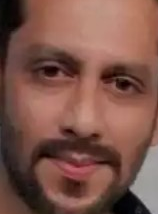

In [29]:
cv2_imshow(face)

In [21]:
face.shape

(88, 65, 3)

In [22]:
face

array([[[ 10,   8,   8],
        [ 10,   8,   8],
        [  6,   6,   6],
        ...,
        [ 77,  98, 146],
        [ 59,  79, 124],
        [ 43,  62, 100]],

       [[ 12,  12,  12],
        [ 11,  11,  11],
        [  6,   6,   6],
        ...,
        [ 80, 104, 158],
        [ 65,  87, 138],
        [ 53,  73, 120]],

       [[ 11,  12,  12],
        [  9,  10,  10],
        [  5,   5,   5],
        ...,
        [ 82, 105, 161],
        [ 71,  92, 149],
        [ 62,  80, 133]],

       ...,

       [[ 62,  75, 113],
        [ 63,  75, 111],
        [ 59,  71, 107],
        ...,
        [164, 161, 163],
        [163, 160, 162],
        [163, 160, 162]],

       [[ 64,  76, 116],
        [ 62,  74, 113],
        [ 60,  71, 108],
        ...,
        [160, 157, 159],
        [160, 157, 159],
        [160, 157, 159]],

       [[ 63,  77, 119],
        [ 62,  77, 116],
        [ 60,  72, 112],
        ...,
        [146, 143, 145],
        [155, 152, 154],
        [159, 156, 158]]

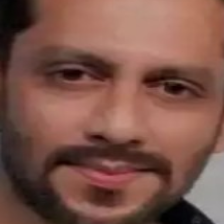

In [32]:
resize_face = cv2.resize(src=face, dsize=(224,224))
cv2_imshow(resize_face)

In [33]:
resize_face.shape

(224, 224, 3)

In [34]:
resize_face.dtype

dtype('uint8')

In [35]:
resize_face = resize_face.astype(dtype='float32')

resize_face.dtype

dtype('float32')

In [36]:
resize_face.shape

(224, 224, 3)

In [37]:
expanded_face = np.expand_dims(a=resize_face, axis=0)

expanded_face.shape

(1, 224, 224, 3)

In [38]:
preprocessed_img = preprocess_input(x=expanded_face)

predict_img = model.predict(x=preprocessed_img).flatten()

In [39]:
predict_img.shape

(2048,)

In [40]:
len(features)

8664

In [42]:
# demo test

cosine_similarity(predict_img.reshape(1,-1),features[0].reshape(1,-1))

array([[0.43518806]], dtype=float32)

In [43]:
# demo test

cosine_similarity(predict_img.reshape(1,-1),features[0].reshape(1,-1))[0][0]

0.43518806

In [44]:
# demo test

predict_img.reshape(1, -1)

array([[0.       , 1.2902087, 5.317375 , ..., 0.720694 , 2.307766 ,
        3.8227003]], dtype=float32)

In [45]:
# demo test
features[0]

array([0.        , 0.        , 1.8680837 , ..., 0.        , 1.2708895 ,
       0.10167735], dtype=float32)

In [46]:
# demo test
features[0].reshape(1, -1)

array([[0.        , 0.        , 1.8680837 , ..., 0.        , 1.2708895 ,
        0.10167735]], dtype=float32)

In [47]:
# find the cosine distance of current image with all the 8655 image features

similarity = []

for i in range(len(features)):
    similarity.append(cosine_similarity(X=predict_img.reshape(1, -1), Y=features[i].reshape(1, -1))[0][0])

In [49]:
similarity[0:10]

[0.43518806,
 0.33664772,
 0.40983397,
 0.3542515,
 0.32109368,
 0.40319175,
 0.4175367,
 0.40008336,
 0.37287375,
 0.33256763]

In [50]:
len(similarity)

8664

In [53]:
list(enumerate(similarity))[0:10]

[(0, 0.43518806),
 (1, 0.33664772),
 (2, 0.40983397),
 (3, 0.3542515),
 (4, 0.32109368),
 (5, 0.40319175),
 (6, 0.4175367),
 (7, 0.40008336),
 (8, 0.37287375),
 (9, 0.33256763)]

In [55]:
sorted(list(enumerate(similarity)), reverse=True, key=lambda x:x[1])[0:20]

[(3676, 0.6346636),
 (4235, 0.63032734),
 (4243, 0.62652504),
 (4258, 0.6252553),
 (4278, 0.6174779),
 (4263, 0.61275345),
 (2916, 0.61201),
 (227, 0.60733294),
 (4251, 0.60635614),
 (4221, 0.60598886),
 (183, 0.6040373),
 (206, 0.5956593),
 (4239, 0.59541255),
 (236, 0.5946276),
 (4274, 0.59424555),
 (192, 0.5932227),
 (186, 0.5901989),
 (4270, 0.58887756),
 (2927, 0.58865637),
 (4238, 0.58685327)]

In [57]:
sorted(list(enumerate(similarity)), reverse=True, key=lambda x:x[1])[0][0]

3676

In [58]:
index_pos = sorted(list(enumerate(similarity)), reverse=True, key=lambda x:x[1])[0][0]

In [67]:
temp_img = cv2.imread(filenames[index_pos])

In [62]:
index_pos

3676

In [69]:
temp_img.shape

(64, 64, 3)

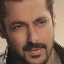

In [70]:
cv2_imshow(temp_img)

In [90]:
# Let's create a function that will take an image and cnn model and retrun the similar looking image


def recommand_similar_img(img, model, detector):
    similarity_features = []

    input_img = cv2.imread(img)
    face_points = detector.detect_faces(img=input_img)
    x, y, width, height = face_points[0]['box']
    face = input_img[y:y+height, x:x+width]
    resize_face = cv2.resize(src=face, dsize=(224,224))
    resize_face = resize_face.astype(dtype='float32')
    expanded_face = np.expand_dims(a=resize_face, axis=0)
    preprocessed_img = preprocess_input(x=expanded_face)
    predict_img = model.predict(x=preprocessed_img).flatten()

    for i in range(len(features)):
        similarity_features.append(cosine_similarity(X=predict_img.reshape(1, -1), Y=features[i].reshape(1, -1))[0][0])
    
    index_pos = sorted(list(enumerate(similarity_features)), reverse=True, key=lambda x:x[1])[0][0]

    print(filenames[index_pos].split('/')[4])
    temp_img = cv2.imread(filenames[index_pos])
    cv2_imshow(temp_img)

Hrithik_Roshan


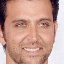

In [94]:
img = r"/content/Screenshot_9.jpg"

recommand_similar_img(img=img, model=model, detector=detector)